# Ne From Power

```{admonition} WIP
This page is currently a **work in progress**, meaning it likely has incomplete explanations and some non-functional code/links/ect.  Please be patient!

If you think you can help, please consider [contributing](https://github.com/ljlamarche/amisr_user_manual#contributing-material).
```

Plasma density can be found either by integrating the area under the ion line in the ISR spectra or from the power of the returned signal.  This second method does not require the full spectra to be resolved, so higher range resolution can be achieved. The other ISR parameters (Te, Ti, and Vlos) cannot be derived from this method.  In general, the normal estimation of Ne is suitable for most applications, especially when co-located estimates of temperature and velocity are desired. However, if the application would benefit from high range or altitude resolution and only plasma density is required, this parameter may be suitable.

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
filename = 'data/20200207.001_lp_5min-fitcal.h5'

Read in the required NeFromPower arrays and create an RTI plot.

In [3]:
with h5py.File(filename, 'r') as h5:
    bidx = 0
    rng0 = h5['NeFromPower/Range'][bidx,:]
    ne0 = h5['NeFromPower/Ne_NoTr'][:,bidx,:]
    utime = h5['Time/UnixTime'][:,0]

time = utime.astype('datetime64[s]')


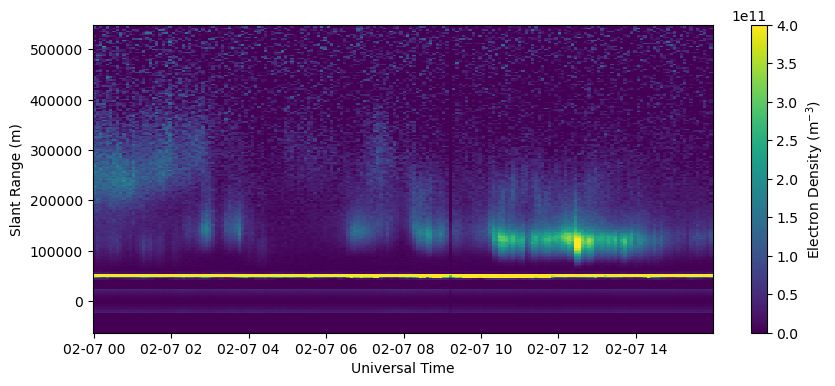

In [4]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng0, ne0.T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

Note the artifacts below 60 km.  These should be removed before any analysis.

<span style="color:red">**QUESTION:** Are these artifacts always in the same place?</span>


In [5]:
ridx = np.argmin(np.abs(60000.-rng0))
rng = rng0[ridx:]
ne = ne0[:,ridx:]

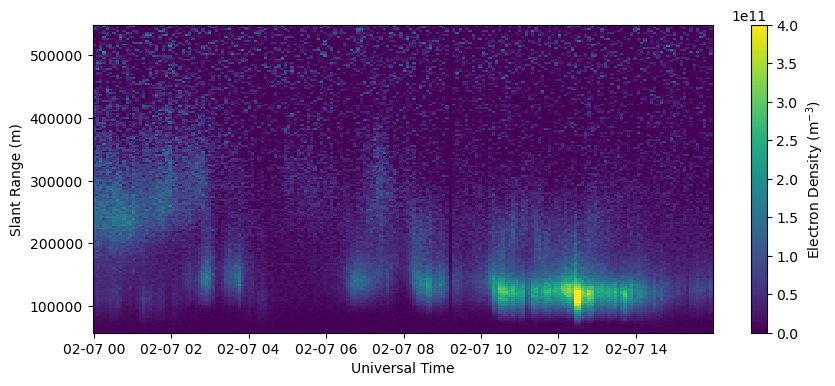

In [6]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng, ne.T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

For comparison, plot the fitted electron densities from this same experiment.

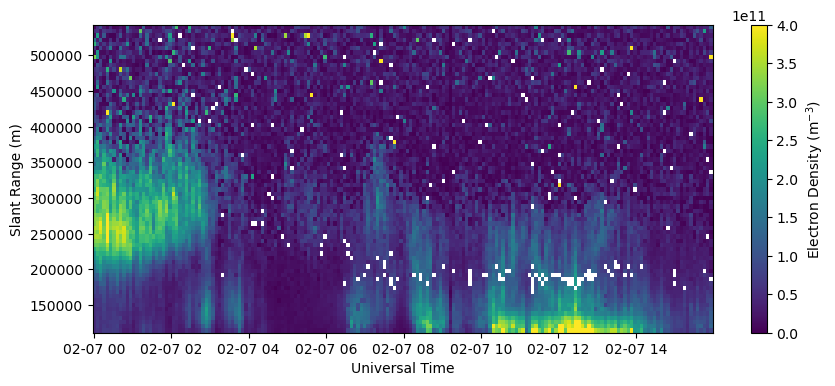

In [7]:
with h5py.File(filename, 'r') as h5:
    bidx = 0
    rng_fit = h5['FittedParams/Range'][bidx,:]
    ne_fit = h5['FittedParams/Ne'][:,bidx,:]
#     utime = h5['Time/UnixTime'][:,0]

# time = utime.astype('datetime64[s]')

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
c = ax.pcolormesh(time, rng_fit[np.isfinite(rng_fit)], ne_fit[:,np.isfinite(rng_fit)].T, vmin=0., vmax=4.e11)
ax.set_xlabel('Universal Time')
ax.set_ylabel('Slant Range (m)')
fig.colorbar(c, label=r'Electron Density (m$^{-3}$)')

Note that the range resolution of the fitted electron density is substantially less than that from NeFromPower.

In [10]:
rng_res_fit = np.nanmean(np.diff(rng_fit))
rng_res = np.nanmean(np.diff(rng))

print(f'Range Resolution of Fitted Ne: {rng_res_fit} m')
print(f'Range Resolution of NeFromPower: {rng_res} m')

Range Resolution of Fitted Ne: 5995.848481514085 m
Range Resolution of NeFromPower: 2997.924560546875 m
